In [325]:
import pandas as pd

In [584]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch


from IPython.display import clear_output


%config InlineBackend.figure_format = 'retina'



plt.rcParams['figure.figsize']=[14,4]

In [585]:
df=pd.read_csv('NDVI_wheat.csv')

In [586]:
df

,date,1,2,7,9,12,15,17,18,19,20,22,23,25,26,27,29,28,30,31
0,2021-01-01,0.114834,0.323531,0.567505,0.446448,0.725454,0.056846,0.576710,0.407500,0.499990,0.672985,0.691130,0.633239,0.072693,0.435274,0.333951,0.106697,0.073545,0.071181,0.127779
1,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,2021-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,2021-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,2021-12-20,0.139453,0.226995,0.171379,0.259448,0.296966,0.195199,0.637552,0.591928,0.065982,0.081530,0.116266,0.244671,0.043874,0.648213,0.477901,0.301815,0.092750,0.257085,0.120999


In [587]:
df['date']=pd.to_datetime(df['date'])

In [588]:
df=df.dropna()

In [589]:
df

,date,1,2,7,9,12,15,17,18,19,20,22,23,25,26,27,29,28,30,31
0,2021-01-01,0.114834,0.323531,0.567505,0.446448,0.725454,0.056846,0.576710,0.407500,0.499990,0.672985,0.691130,0.633239,0.072693,0.435274,0.333951,0.106697,0.073545,0.071181,0.127779
8,2021-01-09,0.133300,0.304264,0.548205,0.449677,0.693256,0.068718,0.581643,0.394177,0.505351,0.644381,0.626694,0.612693,0.087007,0.401648,0.322266,0.103190,0.076785,0.081510,0.123507
20,2021-01-21,0.146167,0.266699,0.489607,0.399699,0.643776,0.100132,0.520378,0.339343,0.446188,0.565095,0.606371,0.560822,0.112701,0.366731,0.281290,0.112696,0.111283,0.116890,0.132520
48,2021-02-18,0.246216,0.214014,0.449637,0.494626,0.548798,0.167243,0.551417,0.312008,0.519101,0.509987,0.506571,0.655145,0.184450,0.302669,0.295947,0.156543,0.074425,0.141676,0.156379
53,2021-02-23,0.238507,0.219448,0.419255,0.454156,0.453867,0.183595,0.496931,0.278552,0.485918,0.457464,0.451700,0.572371,0.196051,0.324979,0.280702,0.158292,0.112584,0.155155,0.164821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2021-11-17,0.060619,0.102649,0.087983,0.212419,0.173273,0.067705,0.597299,0.431806,0.042257,0.213588,0.061995,0.120569,0.031817,0.451265,0.285873,0.266098,0.058111,0.121973,0.059953
271,2021-11-20,0.068217,0.118638,0.096022,0.230521,0.196154,0.085878,0.612580,0.479781,0.045548,0.230243,0.063907,0.138625,0.040417,0.512696,0.332091,0.291028,0.059030,0.138939,0.066251
274,2021-11-30,0.101823,0.147675,0.130297,0.259703,0.264551,0.133228,0.654833,0.541826,0.067684,0.014997,0.057745,0.190573,0.038443,0.604235,0.412092,0.313357,0.065391,0.204441,0.078879
279,2021-12-20,0.139453,0.226995,0.171379,0.259448,0.296966,0.195199,0.637552,0.591928,0.065982,0.081530,0.116266,0.244671,0.043874,0.648213,0.477901,0.301815,0.092750,0.257085,0.120999


In [590]:
df.iloc[:,1:30]

,1,2,7,9,12,15,17,18,19,20,22,23,25,26,27,29,28,30,31
0,0.114834,0.323531,0.567505,0.446448,0.725454,0.056846,0.576710,0.407500,0.499990,0.672985,0.691130,0.633239,0.072693,0.435274,0.333951,0.106697,0.073545,0.071181,0.127779
8,0.133300,0.304264,0.548205,0.449677,0.693256,0.068718,0.581643,0.394177,0.505351,0.644381,0.626694,0.612693,0.087007,0.401648,0.322266,0.103190,0.076785,0.081510,0.123507
20,0.146167,0.266699,0.489607,0.399699,0.643776,0.100132,0.520378,0.339343,0.446188,0.565095,0.606371,0.560822,0.112701,0.366731,0.281290,0.112696,0.111283,0.116890,0.132520
48,0.246216,0.214014,0.449637,0.494626,0.548798,0.167243,0.551417,0.312008,0.519101,0.509987,0.506571,0.655145,0.184450,0.302669,0.295947,0.156543,0.074425,0.141676,0.156379
53,0.238507,0.219448,0.419255,0.454156,0.453867,0.183595,0.496931,0.278552,0.485918,0.457464,0.451700,0.572371,0.196051,0.324979,0.280702,0.158292,0.112584,0.155155,0.164821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.060619,0.102649,0.087983,0.212419,0.173273,0.067705,0.597299,0.431806,0.042257,0.213588,0.061995,0.120569,0.031817,0.451265,0.285873,0.266098,0.058111,0.121973,0.059953
271,0.068217,0.118638,0.096022,0.230521,0.196154,0.085878,0.612580,0.479781,0.045548,0.230243,0.063907,0.138625,0.040417,0.512696,0.332091,0.291028,0.059030,0.138939,0.066251
274,0.101823,0.147675,0.130297,0.259703,0.264551,0.133228,0.654833,0.541826,0.067684,0.014997,0.057745,0.190573,0.038443,0.604235,0.412092,0.313357,0.065391,0.204441,0.078879
279,0.139453,0.226995,0.171379,0.259448,0.296966,0.195199,0.637552,0.591928,0.065982,0.081530,0.116266,0.244671,0.043874,0.648213,0.477901,0.301815,0.092750,0.257085,0.120999


In [591]:
mean=df.iloc[:,1:30].mean(axis=1)

In [592]:
mean

0      0.365121
8      0.355699
20     0.332547
48     0.341413
53     0.321281
         ...   
270    0.181434
271    0.200346
274    0.225357
279    0.261579
280    0.228431
Length: 62, dtype: float64

In [593]:
std=df.iloc[:,1:30].std(axis=1)

In [594]:
std

0      0.242723
8      0.228293
20     0.195004
48     0.178307
53     0.145093
         ...   
270    0.160602
271    0.172368
274    0.196233
279    0.192362
280    0.162716
Length: 62, dtype: float64

In [595]:
df['mean']=mean
df['std']=std

C:\Users\Ashfak\AppData\Local\Temp/ipykernel_20944/2473119400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean']=mean
C:\Users\Ashfak\AppData\Local\Temp/ipykernel_20944/2473119400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std']=std


In [596]:
df


,date,1,2,7,9,12,15,17,18,19,...,23,25,26,27,29,28,30,31,mean,std
0,2021-01-01,0.114834,0.323531,0.567505,0.446448,0.725454,0.056846,0.576710,0.407500,0.499990,...,0.633239,0.072693,0.435274,0.333951,0.106697,0.073545,0.071181,0.127779,0.365121,0.242723
8,2021-01-09,0.133300,0.304264,0.548205,0.449677,0.693256,0.068718,0.581643,0.394177,0.505351,...,0.612693,0.087007,0.401648,0.322266,0.103190,0.076785,0.081510,0.123507,0.355699,0.228293
20,2021-01-21,0.146167,0.266699,0.489607,0.399699,0.643776,0.100132,0.520378,0.339343,0.446188,...,0.560822,0.112701,0.366731,0.281290,0.112696,0.111283,0.116890,0.132520,0.332547,0.195004
48,2021-02-18,0.246216,0.214014,0.449637,0.494626,0.548798,0.167243,0.551417,0.312008,0.519101,...,0.655145,0.184450,0.302669,0.295947,0.156543,0.074425,0.141676,0.156379,0.341413,0.178307
53,2021-02-23,0.238507,0.219448,0.419255,0.454156,0.453867,0.183595,0.496931,0.278552,0.485918,...,0.572371,0.196051,0.324979,0.280702,0.158292,0.112584,0.155155,0.164821,0.321281,0.145093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2021-11-17,0.060619,0.102649,0.087983,0.212419,0.173273,0.067705,0.597299,0.431806,0.042257,...,0.120569,0.031817,0.451265,0.285873,0.266098,0.058111,0.121973,0.059953,0.181434,0.160602
271,2021-11-20,0.068217,0.118638,0.096022,0.230521,0.196154,0.085878,0.612580,0.479781,0.045548,...,0.138625,0.040417,0.512696,0.332091,0.291028,0.059030,0.138939,0.066251,0.200346,0.172368
274,2021-11-30,0.101823,0.147675,0.130297,0.259703,0.264551,0.133228,0.654833,0.541826,0.067684,...,0.190573,0.038443,0.604235,0.412092,0.313357,0.065391,0.204441,0.078879,0.225357,0.196233
279,2021-12-20,0.139453,0.226995,0.171379,0.259448,0.296966,0.195199,0.637552,0.591928,0.065982,...,0.244671,0.043874,0.648213,0.477901,0.301815,0.092750,0.257085,0.120999,0.261579,0.192362


In [597]:
# from scipy import stats
# import numpy as np



# df['95_interval'] = df.apply(lambda row : \
#                              stats.norm.interval(0.95, loc=np.mean(row), 
#                                                  scale=np.std(row)), axis=1)

In [598]:
df=df.set_index('date')

In [599]:
df

,1,2,7,9,12,15,17,18,19,20,...,23,25,26,27,29,28,30,31,mean,std
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.114834,0.323531,0.567505,0.446448,0.725454,0.056846,0.576710,0.407500,0.499990,0.672985,...,0.633239,0.072693,0.435274,0.333951,0.106697,0.073545,0.071181,0.127779,0.365121,0.242723
2021-01-09,0.133300,0.304264,0.548205,0.449677,0.693256,0.068718,0.581643,0.394177,0.505351,0.644381,...,0.612693,0.087007,0.401648,0.322266,0.103190,0.076785,0.081510,0.123507,0.355699,0.228293
2021-01-21,0.146167,0.266699,0.489607,0.399699,0.643776,0.100132,0.520378,0.339343,0.446188,0.565095,...,0.560822,0.112701,0.366731,0.281290,0.112696,0.111283,0.116890,0.132520,0.332547,0.195004
2021-02-18,0.246216,0.214014,0.449637,0.494626,0.548798,0.167243,0.551417,0.312008,0.519101,0.509987,...,0.655145,0.184450,0.302669,0.295947,0.156543,0.074425,0.141676,0.156379,0.341413,0.178307
2021-02-23,0.238507,0.219448,0.419255,0.454156,0.453867,0.183595,0.496931,0.278552,0.485918,0.457464,...,0.572371,0.196051,0.324979,0.280702,0.158292,0.112584,0.155155,0.164821,0.321281,0.145093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-17,0.060619,0.102649,0.087983,0.212419,0.173273,0.067705,0.597299,0.431806,0.042257,0.213588,...,0.120569,0.031817,0.451265,0.285873,0.266098,0.058111,0.121973,0.059953,0.181434,0.160602
2021-11-20,0.068217,0.118638,0.096022,0.230521,0.196154,0.085878,0.612580,0.479781,0.045548,0.230243,...,0.138625,0.040417,0.512696,0.332091,0.291028,0.059030,0.138939,0.066251,0.200346,0.172368
2021-11-30,0.101823,0.147675,0.130297,0.259703,0.264551,0.133228,0.654833,0.541826,0.067684,0.014997,...,0.190573,0.038443,0.604235,0.412092,0.313357,0.065391,0.204441,0.078879,0.225357,0.196233


In [600]:
from scipy import stats
import numpy as np



df['95_interval'] = df.apply(lambda row : \
                             stats.norm.interval(0.68, loc=np.mean(row), 
                                                 scale=np.std(row)), axis=1)

In [601]:
df

,1,2,7,9,12,15,17,18,19,20,...,25,26,27,29,28,30,31,mean,std,95_interval
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.114834,0.323531,0.567505,0.446448,0.725454,0.056846,0.576710,0.407500,0.499990,0.672985,...,0.072693,0.435274,0.333951,0.106697,0.073545,0.071181,0.127779,0.365121,0.242723,"(0.1343210847099302, 0.5842632943685971)"
2021-01-09,0.133300,0.304264,0.548205,0.449677,0.693256,0.068718,0.581643,0.394177,0.505351,0.644381,...,0.087007,0.401648,0.322266,0.103190,0.076785,0.081510,0.123507,0.355699,0.228293,"(0.13771985000146553, 0.5615434273076841)"
2021-01-21,0.146167,0.266699,0.489607,0.399699,0.643776,0.100132,0.520378,0.339343,0.446188,0.565095,...,0.112701,0.366731,0.281290,0.112696,0.111283,0.116890,0.132520,0.332547,0.195004,"(0.14411144295313416, 0.5078827587367205)"
2021-02-18,0.246216,0.214014,0.449637,0.494626,0.548798,0.167243,0.551417,0.312008,0.519101,0.509987,...,0.184450,0.302669,0.295947,0.156543,0.074425,0.141676,0.156379,0.341413,0.178307,"(0.16588612702166403, 0.5014065512172833)"
2021-02-23,0.238507,0.219448,0.419255,0.454156,0.453867,0.183595,0.496931,0.278552,0.485918,0.457464,...,0.196051,0.324979,0.280702,0.158292,0.112584,0.155155,0.164821,0.321281,0.145093,"(0.1741923922616456, 0.4515905669674466)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-17,0.060619,0.102649,0.087983,0.212419,0.173273,0.067705,0.597299,0.431806,0.042257,0.213588,...,0.031817,0.451265,0.285873,0.266098,0.058111,0.121973,0.059953,0.181434,0.160602,"(0.032512206924366044, 0.3283723859434775)"
2021-11-20,0.068217,0.118638,0.096022,0.230521,0.196154,0.085878,0.612580,0.479781,0.045548,0.230243,...,0.040417,0.512696,0.332091,0.291028,0.059030,0.138939,0.066251,0.200346,0.172368,"(0.04020534100405751, 0.35782127549209913)"
2021-11-30,0.101823,0.147675,0.130297,0.259703,0.264551,0.133228,0.654833,0.541826,0.067684,0.014997,...,0.038443,0.604235,0.412092,0.313357,0.065391,0.204441,0.078879,0.225357,0.196233,"(0.04319474184217448, 0.4047446107510414)"


In [602]:
df[['low', 'high']] = pd.DataFrame(df['95_interval'].tolist(), index=df.index)

In [603]:
df

,1,2,7,9,12,15,17,18,19,20,...,27,29,28,30,31,mean,std,95_interval,low,high
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.114834,0.323531,0.567505,0.446448,0.725454,0.056846,0.576710,0.407500,0.499990,0.672985,...,0.333951,0.106697,0.073545,0.071181,0.127779,0.365121,0.242723,"(0.1343210847099302, 0.5842632943685971)",0.134321,0.584263
2021-01-09,0.133300,0.304264,0.548205,0.449677,0.693256,0.068718,0.581643,0.394177,0.505351,0.644381,...,0.322266,0.103190,0.076785,0.081510,0.123507,0.355699,0.228293,"(0.13771985000146553, 0.5615434273076841)",0.137720,0.561543
2021-01-21,0.146167,0.266699,0.489607,0.399699,0.643776,0.100132,0.520378,0.339343,0.446188,0.565095,...,0.281290,0.112696,0.111283,0.116890,0.132520,0.332547,0.195004,"(0.14411144295313416, 0.5078827587367205)",0.144111,0.507883
2021-02-18,0.246216,0.214014,0.449637,0.494626,0.548798,0.167243,0.551417,0.312008,0.519101,0.509987,...,0.295947,0.156543,0.074425,0.141676,0.156379,0.341413,0.178307,"(0.16588612702166403, 0.5014065512172833)",0.165886,0.501407
2021-02-23,0.238507,0.219448,0.419255,0.454156,0.453867,0.183595,0.496931,0.278552,0.485918,0.457464,...,0.280702,0.158292,0.112584,0.155155,0.164821,0.321281,0.145093,"(0.1741923922616456, 0.4515905669674466)",0.174192,0.451591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-17,0.060619,0.102649,0.087983,0.212419,0.173273,0.067705,0.597299,0.431806,0.042257,0.213588,...,0.285873,0.266098,0.058111,0.121973,0.059953,0.181434,0.160602,"(0.032512206924366044, 0.3283723859434775)",0.032512,0.328372
2021-11-20,0.068217,0.118638,0.096022,0.230521,0.196154,0.085878,0.612580,0.479781,0.045548,0.230243,...,0.332091,0.291028,0.059030,0.138939,0.066251,0.200346,0.172368,"(0.04020534100405751, 0.35782127549209913)",0.040205,0.357821
2021-11-30,0.101823,0.147675,0.130297,0.259703,0.264551,0.133228,0.654833,0.541826,0.067684,0.014997,...,0.412092,0.313357,0.065391,0.204441,0.078879,0.225357,0.196233,"(0.04319474184217448, 0.4047446107510414)",0.043195,0.404745


In [604]:
import datetime as dt
from matplotlib.dates import DateFormatter

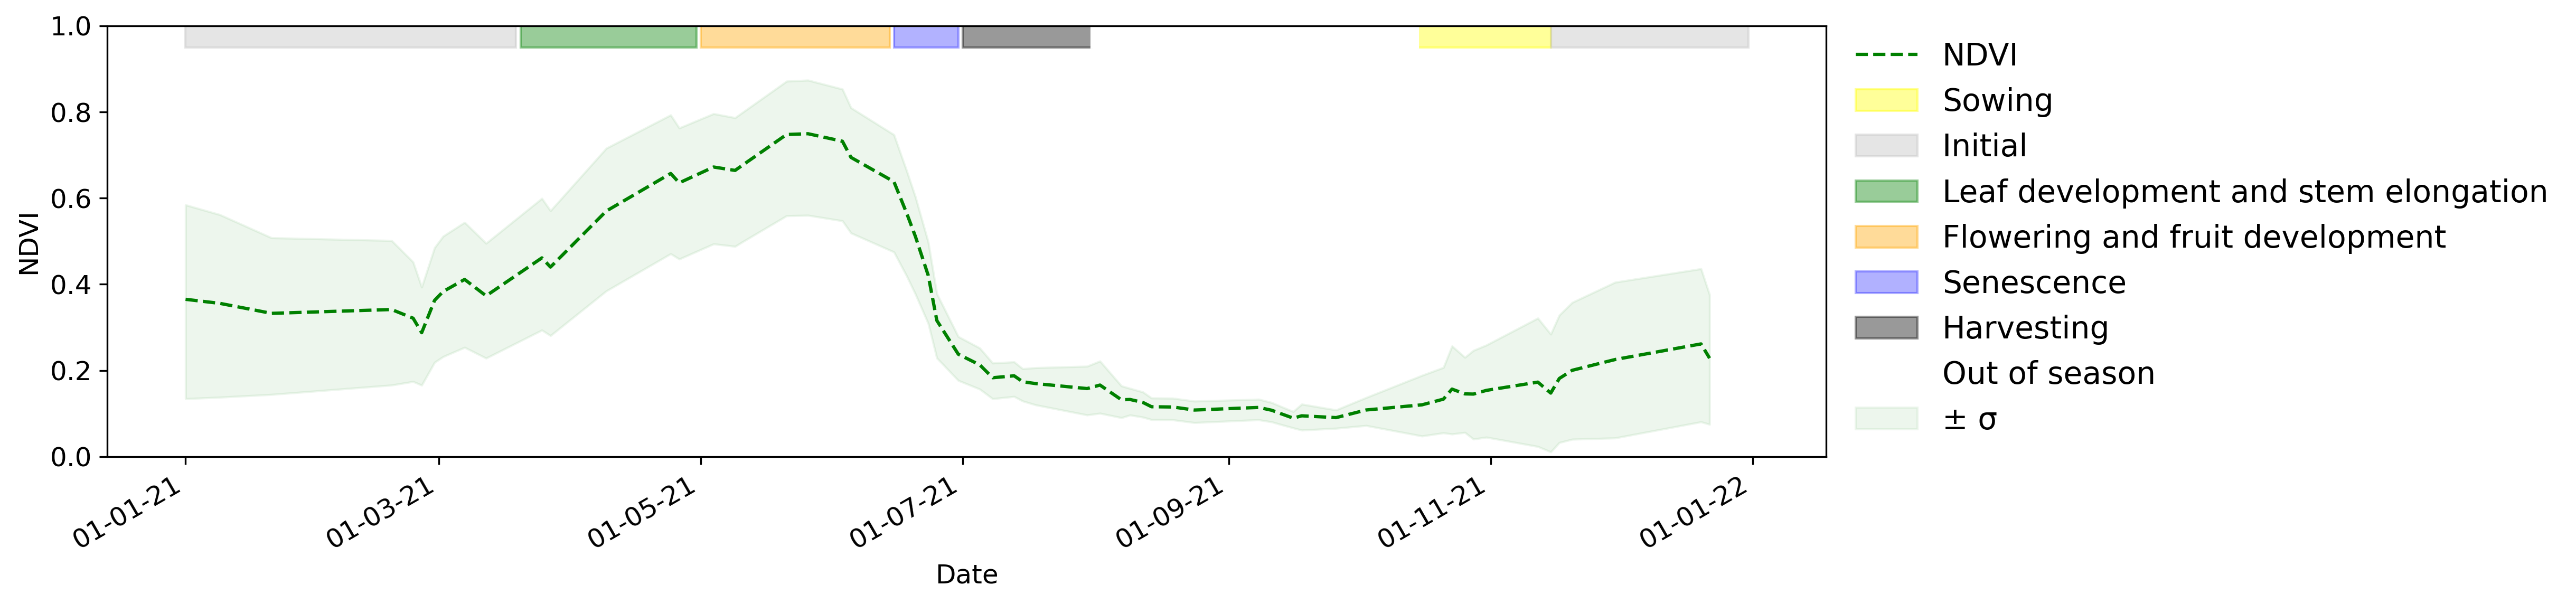

In [606]:
fig, ax = plt.subplots(figsize=(14, 4),  dpi=150)

ax.plot(df.index.values,df['mean'], color='green',label='NDVI', linestyle='--')
#some confidence interval
ax.fill_between(df.index.values, (df['low']), (df['high']), color='green', alpha=.07, label= '\u00B1 σ')
# ax.legend(loc='lower left')
# plt.axvline(dt.datetime(2021, 3, 11), c='g', lw=2,  alpha=.75);

plt.ylabel('NDVI', fontsize=12)
# plt.legend(loc='upper right')

# breaks
ax.axvspan(date2num(dt.datetime(2021,10,15)), date2num(dt.datetime(2021,11,15)), 
           label="Sowing",color="yellow", alpha=0.4, ymax = 1, ymin= 0.95 )

ax.axvspan(date2num(dt.datetime(2021,11,15)), date2num(dt.datetime(2021,12,31)), 
           label="Initial ",color="silver", alpha=0.4, ymax = 1, ymin= 0.95)

ax.axvspan(date2num(dt.datetime(2021,1,1)), date2num(dt.datetime(2021,3,19)),
           color="silver", alpha=0.4, ymax = 1, ymin= 0.95)

ax.axvspan(date2num(dt.datetime(2021,3,20)), date2num(dt.datetime(2021,4,30)), 
           label="Leaf development and stem elongation",color="green", alpha=0.4, ymax = 1, ymin= 0.95)

ax.axvspan(date2num(dt.datetime(2021,5,1)), date2num(dt.datetime(2021,6,14)), 
           label="Flowering and fruit development",color="orange", alpha=0.4, ymax = 1, ymin= 0.95)

ax.axvspan(date2num(dt.datetime(2021,6,15)), date2num(dt.datetime(2021,6,30)),
            label= "Senescence", color="blue", alpha=0.3, ymax = 1, ymin= 0.95)

ax.axvspan(date2num(dt.datetime(2021,7,1)), date2num(dt.datetime(2021,7,31)), 
           label="Harvesting",color="black", alpha=0.4, ymax = 1, ymin= 0.95)

ax.axvspan(date2num(dt.datetime(2021,7,31)), date2num(dt.datetime(2021,10,15)),
           label="Out of season", color="white", alpha= 1, ymax = 1, ymin= 0.95)

# plt.plot(recs2k_bgn,df['fft_change'],color='k',label='fft Nox_change',LineWidth=2)
# plt.axvspan(recs2k_bgn, recs2k_end, color='red', alpha=0.1)
# plt.axvline(dt.datetime(2021, 8, 11), c='g', lw=2,  alpha=.75);

date_form = DateFormatter("%d-%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylim([0, 1])

ax.legend(loc = (1.01, 0.02), frameon = False, prop={'size': 14},)

# # Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)

    #Autodate format2
plt.gcf().autofmt_xdate()    
# order = [0,7,1,2,3,4,5,6]

# #get handles and labels
# handles, labels = plt.gca().get_legend_handles_labels()

# #add legend to plot
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

# plt.title('Beats')